In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install scikit-learn jupyter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 42.0 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 43.1 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 34.7 MB/s  0:00:00m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41/41 [jupyter]9/41 [notebook]b]server]]


**Please write your name below** (in case the file names get mixed up)

In [3]:
#AUDREY BOVET

# Dataset

For this lab, we will use the iris dataset (https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html), which can be directly downloaded from scikit-learn.

It contains N=150 data points about K=3 different types of iris flowers (setosa, versicolor, and virginica). Each point has D=4 dimension, representing the sepal length, the sepal width, the petal length and the petal width (in centimeters).

In [4]:
# Import and download the dataset
from sklearn import datasets

iris_dataset = datasets.load_iris()

In [5]:
# Define features as X and targets as y
X_iris, y_iris = iris_dataset.data, iris_dataset.target
print(X_iris.shape, y_iris.shape)

(150, 4) (150,)


We have a float array of features X_iris of size N x D, where N is the number of points and D the dimensionality of the features, and an integer array of labels y_iris of size N.

Let's quickly visualize this dataset using only the first two dimensions.

In [6]:
# We create a custom "colormap" so that elements with label 0 have color blue,
# elements with label 1 have color red and elements with label 2 have color green in our figure below.
from matplotlib.colors import ListedColormap

colormap = ListedColormap(['blue', 'red', 'green'])

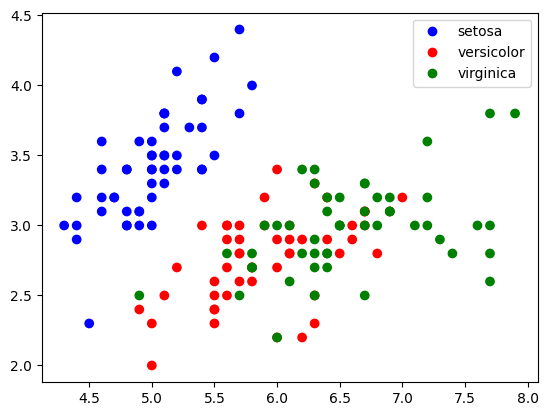

In [7]:
# 2D scatter plot of the dimensions 2 and 3 of the dataset
scatter = plt.scatter(X_iris[:,0], X_iris[:,1], c=y_iris, cmap=colormap)
plt.legend(scatter.legend_elements()[0], iris_dataset.target_names)
plt.show()

# Unsupervised learning

For now let's assume we don't have access to the labels *y_iris*, and see if we can still identify some structure in the dataset.

## K-Means

**Implement the K-Means algorithm and run it on the whole iris dataset using K=3.**

In [ ]:
#from sklearn.cluster import KMeans
#kmeans_iris1 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X_iris)

def init_centroid(X_iris, k): 
    #this function initializes the centroids randomly
    np.random.seed(12) 
    indices = np.random.choice(X_iris.shape[0], size=k)
    centroids = X_iris[indices]
    return centroids, indices
    
centroid_iris_3, indice_3 = init_centroid(X_iris, 3)
#print(centroid_iris_3)


def assignment(centroid, X):
    #This function assigns each point to the nearest centroid
    n = X.shape[0]
    k = centroid.shape[0]
    labels = np.zeros(n)

    for i in range(n):
        distances = []
        for j in range(k):
            distance = np.linalg.norm(X[i] - centroid[j])#compute the distance
            distances.append(distance)
        labels[i] = np.argmin(distances) #find the smallest distance and so the centroid that is the closest

    return labels

labels = assignment(centroid_iris_3, X_iris)
#print(labels)

def update_mean_centroid(labels, X,k):
    #this function updates clusters as the meanf of the assigned points
    n= X.shape[1]
    new_centroids = np.zeros((k, n))
    
    for j in range(k):
        cluster_points = X[labels == j]
        new_centroids[j] = cluster_points.mean(axis=0)
    
    return new_centroids

#print(update_mean_centroid(labels, X_iris, 3))

def kmean(X,k):
    #this functions uses the previous functions to implement k-mean
    centroids, indices = init_centroid(X, k)
    labels = None
    new_labels = assignment(centroids,X)  
    it = 0

    while not np.array_equal(new_labels, labels):
        labels = new_labels
        centroids = update_mean_centroid(labels, X,k) #update centroids
        new_labels = assignment(centroids,X) #new assignment
        
        it += 1

    print(f"nombre d'itérations = {it}")
    return centroids, new_labels

print(kmean(X_iris,3))




[[6.6 3.  4.4 1.4]
 [6.1 2.6 5.6 1.4]
 [7.4 2.8 6.1 1.9]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 2. 1. 2. 1. 1. 2. 1. 2. 1. 2. 0. 1. 2. 1. 1. 1. 1. 2. 2. 1.
 2. 1. 2. 0. 2. 2. 0. 0. 1. 2. 2. 2. 1. 1. 1. 2. 1. 1. 0. 2. 2. 0. 1. 2.
 2. 0. 1. 1. 1. 1.]
[[5.51904762 3.1        2.96095238 0.85047619]
 [6.14       2.804      5.268      1.908     ]
 [7.175      3.15       6.055      2.145     ]]
nombre d'itérations = 6
(array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

**Display only the first 2 dimensions as in the figure above, with color points based on their assigned clusters. Do you have a result consistent with the true flower categories?**

nombre d'itérations = 6


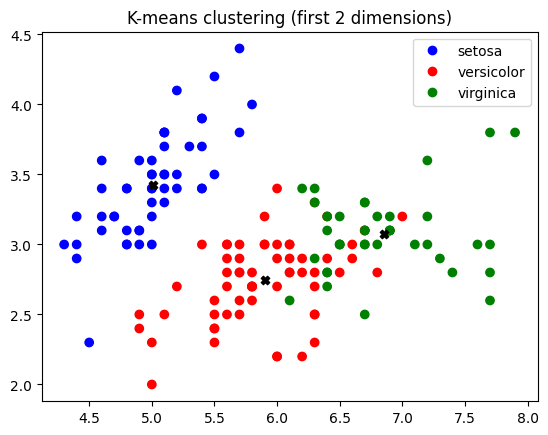

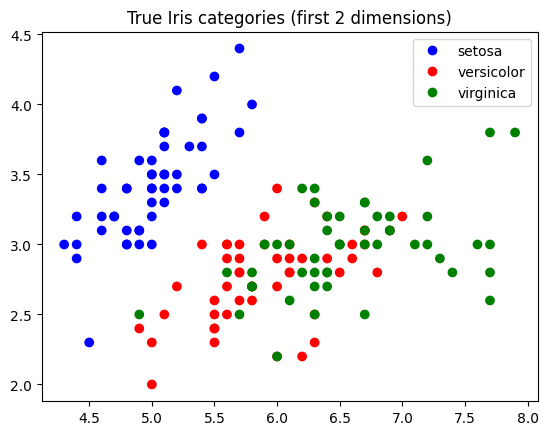

'**Answer to the question**\nThe result is partly consistent.\n\nThe cluster corresponding to Setosa is well separated. K-means finds it because it is clearly distinct from the other.\n\nHowever, the two other species (Versicolor and Virginica) are not perfectly separated in the first two dimensions. \nThey overlap, so K-means mixes some of their points but the clusters are still very close to what is the true flowers categories'

In [29]:
centroids, labels = kmean(X_iris, 3)
colormap = ListedColormap(['blue', 'red', 'green'])

scatter = plt.scatter(X_iris[:,0], X_iris[:,1], c=labels, cmap=colormap)#c=labels to have the clusters found by k-mean

plt.scatter(centroids[:,0], centroids[:,1], c="black", marker="X", label="Centroids")#show the centroids
plt.legend(scatter.legend_elements()[0], iris_dataset.target_names)
plt.title("K-means clustering (first 2 dimensions)")
plt.show()

scatter = plt.scatter(X_iris[:,0], X_iris[:,1], c=y_iris, cmap=colormap) #c=y_iris to have the true flower categories
plt.legend(scatter.legend_elements()[0], iris_dataset.target_names)
plt.title("True Iris categories (first 2 dimensions)")
plt.show()

'''**Answer to the question**
The result is partly consistent.

The cluster corresponding to Setosa is well separated. K-means finds it because it is clearly distinct from the other.

However, the two other species (Versicolor and Virginica) are not perfectly separated in the first two dimensions. 
They overlap, so K-means mixes some of their points but the clusters are still very close to what is the true flowers categories'''



**Answer to the question**
The result is partly consistent.

The cluster corresponding to Setosa is well separated. K-means finds it because it is clearly distinct from the other.

However, the two other species (Versicolor and Virginica) are not perfectly separated in the first two dimensions. They overlap, so K-means mixes some of their points but the clusters are still very close to what is the true flowers categories

Now you may use the scikit-learn implementation sklearn.cluster.KMeans if you wish (you don't have to, but it will probably be easier with this class).

**Plot the "inertia" with respect to the number of clusters after running KMeans with different numbers of clusters. Here, "inertia" means the objective $\sum_{n=1}^N \lVert \mathbf{x}_n - \mathbf{c}_{a(\mathbf{x}_n)}\rVert_2^2$**

You don't have to compute the inertia manually, there is a way to obtain it directly if you look at the documentation of the class sklearn.cluster.KMeans

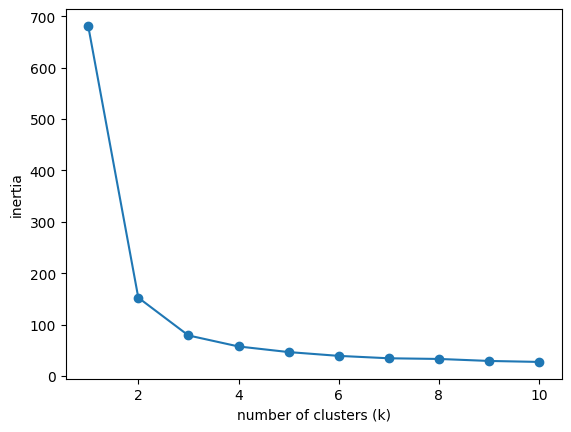

In [21]:
#from sklearn.cluster import KMeans
#help(KMeans)

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=12, n_init="auto").fit(X_iris) #As i am born the 12/02 I choose the seed and random state always at 12
    inertias.append(kmeans.inertia_) #inertia_ :float : Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided. Foundd in the documentation

plt.plot(K, inertias, marker="o")
plt.xlabel("number of clusters (k)")
plt.ylabel("inertia")
plt.show()

**If we didn't know how many clusters we needed, could we infer this number from this figure?**

In [24]:
# According to the elbow method, I would have chosen 3 as this value is corresponding to a sharpe decrease of inertia.
# So in a way yes this figure could help us but it is not perfect

**Did you think about running KMeans several times to make sure we don't obtain different results (and thus different inertia) for a given number of clusters?**

Don't actually bother showing me that you did, it won't be graded anyway. But ideally, this is something that you should have thought about.

## Not K-Means

Let's get a new (generated) dataset.

In [25]:
X_moons, y_moons = sklearn.datasets.make_moons(n_samples=200, shuffle=True, noise=0.05, random_state=42)

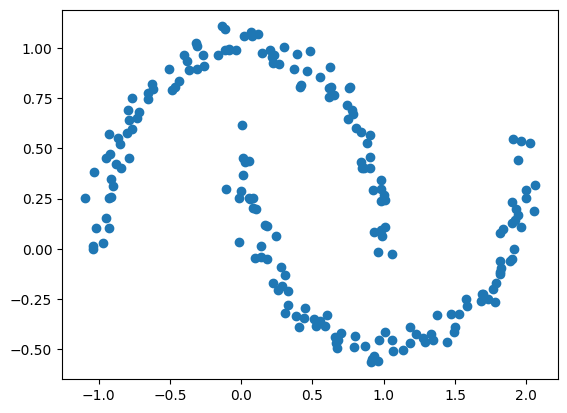

In [26]:
plt.scatter(X_moons[:,0], X_moons[:,1])
plt.show()

**How many groups of points would a human probably intuitively identify here?**

In [27]:
# I would say 2 groups

**Run K-Means on this dataset with the number of clusters you suggested.**

(To display the result with a code similar to previously, you may need to define a new colormap with only two colors).

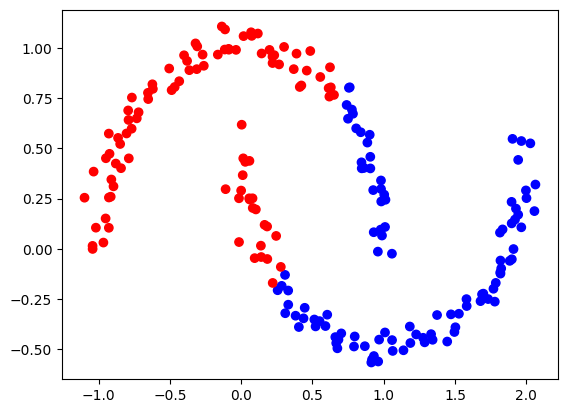

In [30]:
from matplotlib.colors import ListedColormap

colormap = ListedColormap(['blue', 'red'])

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans_moons = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X_moons)
labels_moons = kmeans_moons.labels_
plt.scatter(X_moons[:,0], X_moons[:,1], c=labels_moons, cmap=colormap)
plt.show()


**Are the "intuitive" clusters correctly identified? Why?**

In [31]:
#No, the clusters by kmean are not the intuitive clusters as they are non-linearly separable clusters

In a future class (and lab), we will cover other clustering algorithms that may be more suitable for situations like this.

# Supervised learning

## K-nearest neighbors

Now let's go back to our Iris dataset. Remember that until now, we have not used *y_iris* (defined in the 3rd cell of this notebook), as in an unsupervised learning setting, we don't have access to labels.

Let's now switch to a supervised learning setting.

First, let's divide the data into a training set, that we will use as a reference to make predictions, and a testing set, for which we wish to make predictions.

If you look at the labels, you can see that they are sorted. We will thus start by shuffling the dataset, so that we do not have only 1 class in the testing set.

In [34]:
from sklearn.utils import shuffle

X_iris_shuffled, y_iris_shuffled = shuffle(X_iris, y_iris, random_state=42)

Now, let's use for example the first 100 elements of the dataset and their labels  as training points, and the last 50 as testing points.

**Divide the dataset into a training set and a testing set.**

In [35]:
X_iris_train = X_iris_shuffled[:100]
y_iris_train = y_iris_shuffled[:100]

X_iris_test = X_iris_shuffled[-50:]
y_iris_test = y_iris_shuffled[-50:]

**Implement a B-nearest neighbor classifier, that uses the training set as reference points and can be used to make predict the class of the testing set.**

(I called it a B-nearest neighbor classifier as opposed to K-nearest neighbor in order not to induce confusion with the K for K-Means, it is not the same thing at all in this context.)

You may use a number of neighbors B=3 if it's more convenient.

In [42]:
import numpy as np
from collections import Counter

def B_nearest_neighbor(X_train, y_train, X_test, B):
    y_pred = []
    
    for x in X_test:
        distances = np.linalg.norm(X_train - x, axis=1) #we compute the distances x to all the point of X_train
        neighbors_index = np.argsort(distances)[:B]#We kept the index of the B nearest neighbors
        neighbor_labels = y_train[neighbors_index]#We look at the labels of those neigbors
        counter = Counter(neighbor_labels)
        label_most_common = (counter.most_common(1)[0][0]) #we select the label the most common
        y_pred.append(label_most_common)
    
    return np.array(y_pred)


**Use your classifier to predict the classes of the 50 samples in the testing set.**

**Compare these predictions with actual answers, the labels in the testing set. What is the accuracy, i.e. the percentage of correct predictions?**

In [51]:
y_pred_iris = B_nearest_neighbor(X_iris_train, y_iris_train, X_iris_test, 3)
print(y_pred_iris)
print(y_iris_test)
differences = np.sum(y_pred_iris != y_iris_test)
print(differences)
n= len(y_pred_iris)
accuracy = ((n-differences)/n)*100
print(accuracy)

[0 0 0 2 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 1 0 1 2]
[0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 2 0 1 2]
2
96.0


**Do the same thing, this time using the sklearn classifier. Do you get a comparable result?**

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_iris_train, y_iris_train)
y_pred_sklearn = knn.predict(X_iris_test)
print(y_pred_sklearn)
print(y_iris_test)
differences = np.sum(y_pred_sklearn != y_iris_test)
print(differences)
n= len(y_pred_iris)
accuracy = ((n-differences)/n)*100
print(accuracy)
print(knn.score(X_iris_test, y_iris_test))

[0 0 0 2 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 1 0 1 2]
[0 0 0 1 2 0 2 2 0 1 1 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2
 2 1 2 1 1 2 2 0 1 2 0 1 2]
2
96.0
0.96


**You (should have) obtained a fairly good result. Is machine learning that simple?**

I will answer this one for you: in general, **no**.

This was a "toy" dataset, that was extremely simple (after all, this was the first class of machine learning). In reality, most problems you are likely to work on are much more complex.

As an example, let's try using the same approach on an another dataset available from the Olivetti faces dataset (https://scikit-learn.org/stable/datasets/real_world.html#olivetti-faces-dataset)

In [55]:
from sklearn import datasets

faces = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /home/onyxia/scikit_learn_data


It represents faces of different people as arrays/vectors of pixels. Let's have a look at a couple of examples (don't bother too much with the code below, this is just to show you a more difficult problem).

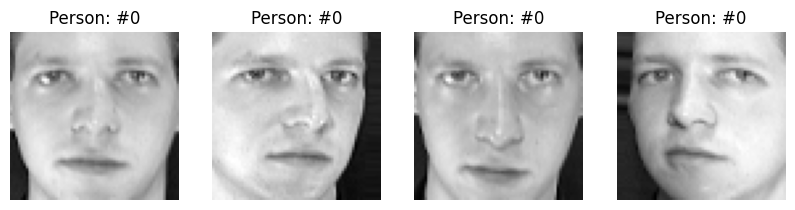

In [56]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, faces.images, faces.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray)
    ax.set_title("Person: #%i" % label)

The 4 images above are 4 distinct photographs of the same person, labeled person 0.

Let's again divide the dataset into a train/test split, and use a nearest neighbors classifier to make predictions.

In [57]:
from sklearn.model_selection import train_test_split

# I suffle and split my dataset at the same time
X_train, X_test, y_train, y_test = train_test_split(
    faces.data, faces.target, test_size=0.5, shuffle=True, random_state=42
)

In [58]:
# We "train" the classifier
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [59]:
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy*100}%")

Accuracy: 71.5%


To be honest, this is already quite good, and actually much better than what I was expecting before running this code.

However, I wouldn't really want a system that has a 30% chance of failure of misidentify people to screen passengers at an airport. Depending on the application, even a 0.1% of failure may be too much. For example, I would not want my autonomous car to have a 0.1% chance of running a red light.

So (un?)fortunately, it looks like our machine learning journey is not over yet.

See you next class.